In [1]:
import numpy as np
import matplotlib.pyplot as plt
import voltage_measurement_PC as vm
import ipywidgets as widgets
from IPython.display import clear_output, display

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#path = r'R:\SwapFiles\Shuai\front detection\yans sample\\'
path = r'C:\Users\z5013374\OneDrive - UNSW\PhD\Projects\Temp Coeff of Voc (Trina)\measurement\Front detection\2019_02_15 trina front detection\\'

In [4]:
%matplotlib notebook

In [5]:
Na = 9.60254e15 # Change
Nd = 1
T = 343 # Change

In [6]:
W = 0.01934 # Change
A = 0.0000781786461861564
B = 0.0312360760990958
C = -0.76121
#C = 0
sinton_consts = (A,B,C)

In [7]:
f_1 = '1-863_S7_R3_Flash_PC_PL_0.01s_70C_Raw_Data.dat'
f_2 = '1-863_S8_R3_Flash_PC_PL_0.01s_70C_ND4_Raw_Data.dat'
f_3 = '1-863_S8_R3_Laser_PL_0.2s_70C_Raw_Data.dat'
f_4 = '1-863_S8_R3_Laser_PL_0.008s_70C_Raw_Data.dat'
f_5 = '1-863_S8_R3_Laser_PL_0.008s_70C_Raw_Data.dat'
f_6 = '1-863_S8_R3_Laser_PL_0.008s_70C_Raw_Data.dat'

***Note:*** The order of columns in the flash and laser data are different to usual. In both cases, Column 2 (usually labelled 'PC') contains the PL signal. Then in Flash measurements the reference signal is in Column 3 (usually 'PL'). In laser measurements, the reference signal is in the usual Column 1.

In [8]:
d_1 = vm.Voltage_Measurement(path + f_1, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_1.raw['ref'] = -1*d_1.raw['ref'] 
# d_1.names = ['t', 'Voc', 'PL', 'ref']
# d_1.load_data()

In [9]:
d_2 = vm.Voltage_Measurement(path + f_2, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_2.raw['ref'] = -1*d_2.raw['ref'] 
# d_2.names = ['t', 'Voc', 'PL', 'ref']
# d_2.load_data()

In [10]:
d_3 = vm.Voltage_Measurement(path + f_3, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_3.raw['ref'] = -1*d_3.raw['ref'] 
# d_3.names = ['t', 'ref', 'PL', 'Voc']
# d_3.load_data()

In [11]:
d_4 = vm.Voltage_Measurement(path + f_4, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_4.raw['ref'] = -1*d_4.raw['ref'] 
# d_4.names = ['t', 'ref', 'PL', 'Voc']
# d_4.load_data()

In [12]:
d_5 = vm.Voltage_Measurement(path + f_5, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_5.raw['ref'] = -1*d_5.raw['ref'] 
# d_5.names = ['t', 'ref', 'PL', 'Voc']
# d_5.load_data()

In [13]:
d_6 = vm.Voltage_Measurement(path + f_6, W=W, Na=Na, Nd=Nd, T=T, sinton_consts=sinton_consts)
d_6.raw['ref'] = -1*d_6.raw['ref'] 
# d_6.names = ['t', 'ref', 'PL', 'Voc']
# d_6.load_data()

# Cropping and binning checks

<IPython.core.display.Javascript object>


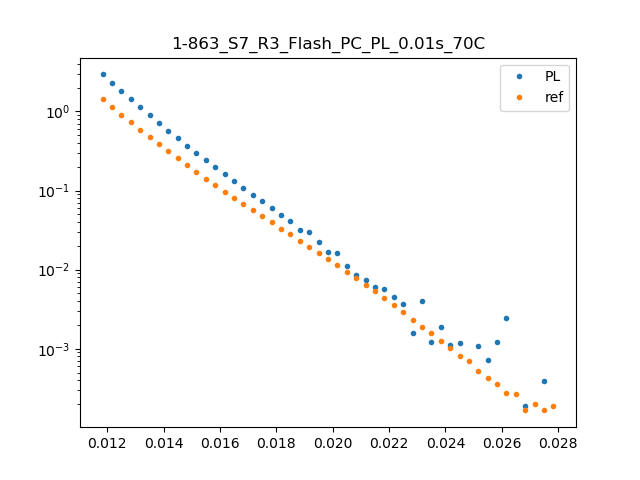

FloatRangeSlider(value=(0.05, 0.32), description='crop range', max=1.0, step=0.01)

IntSlider(value=8, description='binning', min=1)

In [14]:
crop1 = widgets.FloatRangeSlider(min=0., max=1., value=[0.05,0.32], step=0.01, continuous_update=True, description='crop range')
b1 = widgets.IntSlider(min=1, max=100, value=8, step=1, continuous_update=True, description='binning')

fig1, ax1  = plt.subplots()
PL_line1,  = ax1.plot(d_1.data()['t'], d_1.data()['PL'], '.', label='PL')
ref_line1, = ax1.plot(d_1.data()['t'], d_1.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_1[:-13])
plt.legend()

def update_plot1():
    d_1.crop_start = crop1.value[0]
    d_1.crop_end = crop1.value[1]
    d_1.binn = b1.value
    
    PL_line1.set_xdata(d_1.data()['t'])
    PL_line1.set_ydata(d_1.data()['PL'])
    ref_line1.set_xdata(d_1.data()['t'])
    ref_line1.set_ydata(d_1.data()['ref'])
    
    ax1.relim()
    ax1.autoscale_view()
    fig1.canvas.draw()

crop1.on_trait_change(update_plot1, 'value')
b1.on_trait_change(update_plot1, 'value')

display(crop1,b1)
update_plot1()

<IPython.core.display.Javascript object>


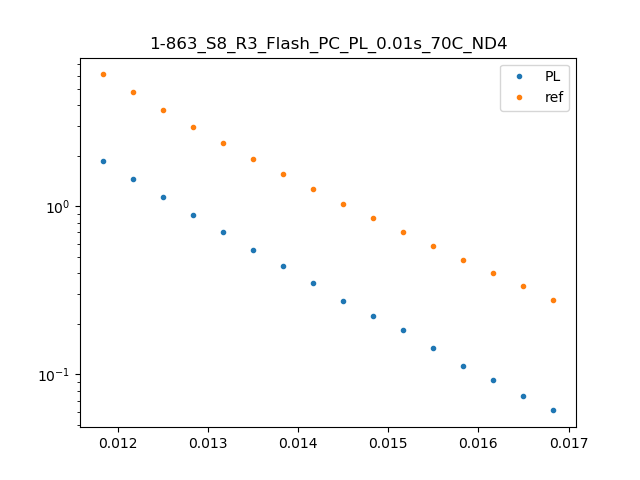

FloatRangeSlider(value=(0.06, 0.32), description='crop range', max=1.0, step=0.01)

IntSlider(value=5, description='binning', max=200, min=1)

In [15]:
crop2 = widgets.FloatRangeSlider(min=0., max=1., value=[0.06,0.32], step=0.01, continuous_update=True, description='crop range')
b2 = widgets.IntSlider(min=1, max=200, value=5, step=1, continuous_update=True, description='binning')

fig2, ax2  = plt.subplots()
PL_line2,  = ax2.plot(d_2.data()['t'], d_2.data()['PL'], '.', label='PL')
ref_line2, = ax2.plot(d_2.data()['t'], d_2.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_2[:-13])
plt.legend()

def update_plot2():
    d_2.crop_start = crop2.value[0]
    d_2.crop_end = crop2.value[1]
    d_2.binn = b2.value
    
    PL_line2.set_xdata(d_2.data()['t'])
    PL_line2.set_ydata(d_2.data()['PL'])
    ref_line2.set_xdata(d_2.data()['t'])
    ref_line2.set_ydata(d_2.data()['ref'])
    
    ax2.relim()
    ax2.autoscale_view()
    fig2.canvas.draw()

crop2.on_trait_change(update_plot2, 'value')
b2.on_trait_change(update_plot2, 'value')

display(crop2,b2)
update_plot2()

<IPython.core.display.Javascript object>


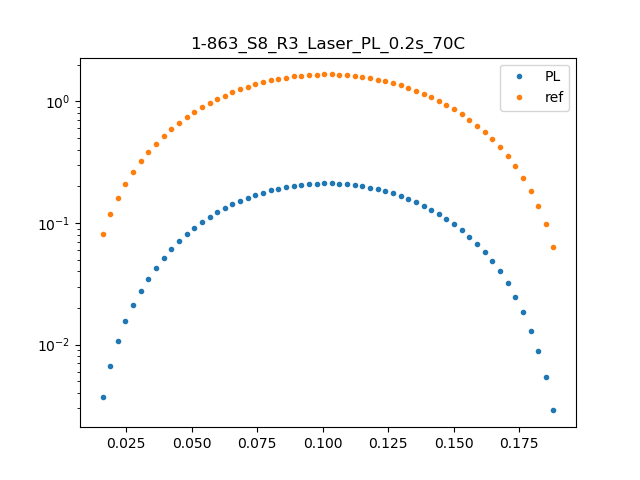

FloatRangeSlider(value=(0.06, 0.76), description='crop range', max=1.0, step=0.01)

IntSlider(value=35, description='binning', max=200, min=1)

In [16]:
crop3 = widgets.FloatRangeSlider(min=0., max=1., value=[0.06,0.76], step=0.01, continuous_update=True, description='crop range')
b3 = widgets.IntSlider(min=1, max=200, value=35, step=1, continuous_update=True, description='binning')

fig3, ax3  = plt.subplots()
PL_line3,  = ax3.plot(d_3.data()['t'], d_3.data()['PL'], '.', label='PL')
ref_line3, = ax3.plot(d_3.data()['t'], d_3.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_3[:-13])
plt.legend()

def update_plot3():
    d_3.crop_start = crop3.value[0]
    d_3.crop_end = crop3.value[1]
    d_3.binn = b3.value
    
    PL_line3.set_xdata(d_3.data()['t'])
    PL_line3.set_ydata(d_3.data()['PL'])
    ref_line3.set_xdata(d_3.data()['t'])
    ref_line3.set_ydata(d_3.data()['ref'])
    
    ax3.relim()
    ax3.autoscale_view()
    fig3.canvas.draw()

crop3.on_trait_change(update_plot3, 'value')
b3.on_trait_change(update_plot3, 'value')

display(crop3,b3)
update_plot3()

<IPython.core.display.Javascript object>


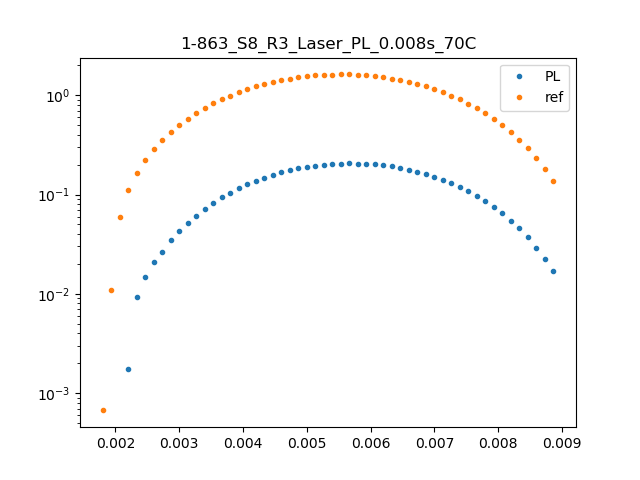

FloatRangeSlider(value=(0.06, 0.47), description='crop range', max=1.0, step=0.01)

IntSlider(value=8, description='binning', max=200, min=1)

In [17]:
crop4 = widgets.FloatRangeSlider(min=0., max=1., value=[0.06,0.47], step=0.01, continuous_update=True, description='crop range')
b4 = widgets.IntSlider(min=1, max=200, value=8, step=1, continuous_update=True, description='binning')

fig4, ax4  = plt.subplots()
PL_line4,  = ax4.plot(d_4.data()['t'], d_4.data()['PL'], '.', label='PL')
ref_line4, = ax4.plot(d_4.data()['t'], d_4.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_4[:-13])
plt.legend()

def update_plot4():
    d_4.crop_start = crop4.value[0]
    d_4.crop_end = crop4.value[1]
    d_4.binn = b4.value
    
    PL_line4.set_xdata(d_4.data()['t'])
    PL_line4.set_ydata(d_4.data()['PL'])
    ref_line4.set_xdata(d_4.data()['t'])
    ref_line4.set_ydata(d_4.data()['ref'])
    
    ax4.relim()
    ax4.autoscale_view()
    fig4.canvas.draw()

crop4.on_trait_change(update_plot4, 'value')
b4.on_trait_change(update_plot4, 'value')

display(crop4,b4)
update_plot4()

<IPython.core.display.Javascript object>


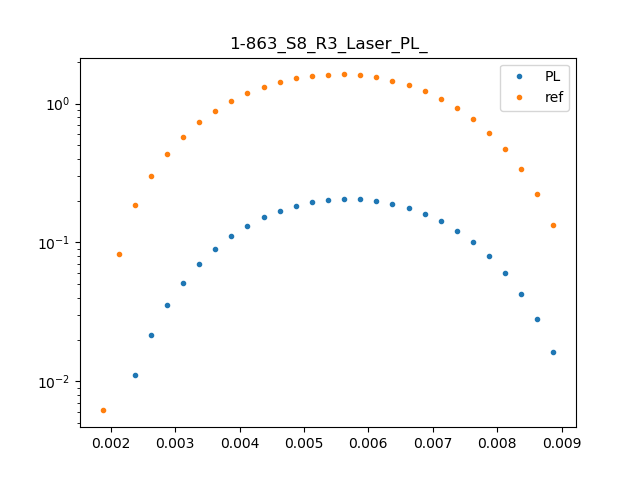

FloatRangeSlider(value=(0.06, 0.31), description='crop range', max=1.0, step=0.01)

IntSlider(value=15, description='binning', max=200, min=1)

In [18]:
crop5 = widgets.FloatRangeSlider(min=0., max=1., value=[0.06,0.31], step=0.01, continuous_update=True, description='crop range')
b5 = widgets.IntSlider(min=1, max=200, value=15, step=1, continuous_update=True, description='binning')

fig5, ax5  = plt.subplots()
PL_line5,  = ax5.plot(d_5.data()['t'], d_5.data()['PL'], '.', label='PL')
ref_line5, = ax5.plot(d_5.data()['t'], d_5.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_5[:-23])
plt.legend()

def update_plot5():
    d_5.crop_start = crop5.value[0]
    d_5.crop_end = crop5.value[1]
    d_5.binn = b5.value
    
    PL_line5.set_xdata(d_5.data()['t'])
    PL_line5.set_ydata(d_5.data()['PL'])
    ref_line5.set_xdata(d_5.data()['t'])
    ref_line5.set_ydata(d_5.data()['ref'])
    
    ax5.relim()
    ax5.autoscale_view()
    fig5.canvas.draw()

crop5.on_trait_change(update_plot5, 'value')
b5.on_trait_change(update_plot5, 'value')

display(crop5,b5)
update_plot5()

<IPython.core.display.Javascript object>


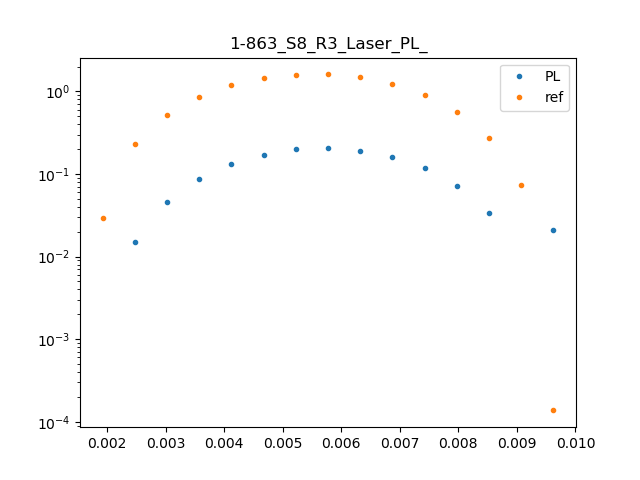

FloatRangeSlider(value=(0.05, 0.6), description='crop range', max=1.0, step=0.01)

IntSlider(value=33, description='binning', max=200, min=1)

In [19]:
crop6 = widgets.FloatRangeSlider(min=0., max=1., value=[0.05,0.6], step=0.01, continuous_update=True, description='crop range')
b6 = widgets.IntSlider(min=1, max=200, value=33, step=1, continuous_update=True, description='binning')

fig6, ax6  = plt.subplots()
PL_line6,  = ax6.plot(d_6.data()['t'], d_6.data()['PL'], '.', label='PL')
ref_line6, = ax6.plot(d_6.data()['t'], d_6.data()['ref'], '.', label='ref')

plt.semilogy()
plt.title(f_6[:-23])
plt.legend()

def update_plot6():
    d_6.crop_start = crop6.value[0]
    d_6.crop_end = crop6.value[1]
    d_6.binn = b6.value
    
    PL_line6.set_xdata(d_6.data()['t'])
    PL_line6.set_ydata(d_6.data()['PL'])
    ref_line6.set_xdata(d_6.data()['t'])
    ref_line6.set_ydata(d_6.data()['ref'])
    
    ax6.relim()
    ax6.autoscale_view()
    fig6.canvas.draw()

crop6.on_trait_change(update_plot6, 'value')
b6.on_trait_change(update_plot6, 'value')

display(crop6,b6)
update_plot6()

### Plot lifetimes

In [20]:
fs_laser = 7.05e16
R_810 = 0.00311795


In [21]:
np.log10(7.05e16)

16.8481891169914

<IPython.core.display.Javascript object>


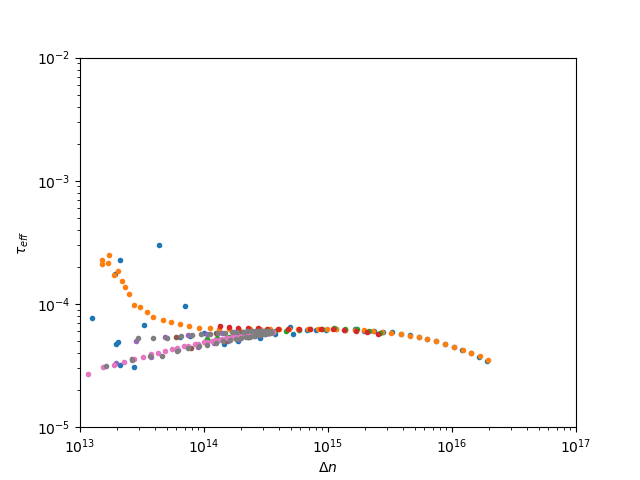

FloatSlider(value=18.7, description='1: A_i 6.61e+17', max=21.0, min=14.0, step=0.005)

FloatSlider(value=18.48, description='1: F_s 7.41e+18', max=21.0, min=14.0, step=0.005)

FloatSlider(value=17.7, description='2: A_i 6.61e+16', max=21.0, min=14.0, step=0.005)

FloatSlider(value=18.43, description='2: F_s 1.38e+17', max=21.0, min=14.0, step=0.005)

FloatSlider(value=17.78, description='5: A_i 6.61e+16', max=21.0, min=14.0, step=0.005)

FloatSlider(value=16.79, description='6: A_i 6.61e+16', max=21.0, min=14.0, step=0.005)

FloatSlider(value=17.7, description='3: A_i 6.61e+16', max=20.0, min=14.0, step=0.005)

FloatSlider(value=16.7, description='4: A_i 5.01e+16', max=20.0, min=14.0, step=0.005)

ToggleButton(value=False, description='Legend', icon='check', tooltip='Display legend')

In [29]:
Ai_slider1 = widgets.FloatSlider(min=14, max=21, value=18.7, step=0.005, continuous_update=True, description=r'1: A_i {:0.2e}'.format(d_1.Ai))
Fs_slider1 = widgets.FloatSlider(min=14, max=21, value=18.48, step=0.005, continuous_update=True, description=r'1: F_s {:0.2e}'.format(d_1.Fs))
Ai_slider2 = widgets.FloatSlider(min=14, max=21, value=17.7, step=0.005, continuous_update=True, description=r'2: A_i {:0.2e}'.format(d_2.Ai))
Fs_slider2 = widgets.FloatSlider(min=14, max=21, value=18.43, step=0.005, continuous_update=True, description=r'2: F_s {:0.2e}'.format(d_2.Fs))
Ai_slider5 = widgets.FloatSlider(min=14, max=21, value=17.78, step=0.005, continuous_update=True, description=r'5: A_i {:0.2e}'.format(d_2.Ai))
#Fs_slider5 = widgets.FloatSlider(min=14, max=21, value=16.872156272748292, step=0.005, continuous_update=True, description=r'5: F_s {:0.2e}'.format(d_2.Fs))
Ai_slider6 = widgets.FloatSlider(min=14, max=21, value=16.79, step=0.005, continuous_update=True, description=r'6: A_i {:0.2e}'.format(d_2.Ai))
#Fs_slider6 = widgets.FloatSlider(min=14, max=21, value=16.872156272748292, step=0.005, continuous_update=True, description=r'6: F_s {:0.2e}'.format(d_2.Fs))

Ai_slider3 = widgets.FloatSlider(min=14, max=20, value=17.7, step=0.005, continuous_update=True, description=r'3: A_i {:0.2e}'.format(d_3.Ai))
Ai_slider4 = widgets.FloatSlider(min=14, max=20, value=16.7, step=0.005, continuous_update=True, description=r'4: A_i {:0.2e}'.format(d_4.Ai))

legend_disp_toggle = widgets.ToggleButton(value=False, description='Legend', disabled=False, button_style='', tooltip='Display legend', icon='check')

fig_LT, ax_LT  = plt.subplots()
d1_line,  = ax_LT.plot(d_1.nxc_from_PL(), d_1.tau_eff(nxc=d_1.nxc_from_PL()), '.', label = f_1[:-13])
d1_PC_line,  = ax_LT.plot(d_1.nxc_from_PC(), d_1.tau_eff(nxc=d_1.nxc_from_PC()), '.', label = 'PC_'+f_1[:-13])
d2_line,  = ax_LT.plot(d_2.nxc_from_PL(), d_2.tau_eff(nxc=d_2.nxc_from_PL()), '.', label = f_2[:-13])
d2_PC_line,  = ax_LT.plot(d_2.nxc_from_PC(), d_2.tau_eff(nxc=d_2.nxc_from_PC()), '.', label = 'PC_'+f_2[:-13])
d5_line,  = ax_LT.plot(d_5.nxc_from_PL(), d_5.tau_eff(nxc=d_5.nxc_from_PL()), '.', label = f_5[:-13])
#d5_PC_line,  = ax_LT.plot(d_5.nxc_from_PC(), d_5.tau_eff(nxc=d_5.nxc_from_PC()), '.', label = 'PC_'+f_5[:-13])
d6_line,  = ax_LT.plot(d_6.nxc_from_PL(), d_6.tau_eff(nxc=d_6.nxc_from_PL()), '.', label = f_6[:-13])
#d6_PC_line,  = ax_LT.plot(d_6.nxc_from_PC(), d_6.tau_eff(nxc=d_6.nxc_from_PC()), '.', label = 'PC_'+f_6[:-13])
d3_line,  = ax_LT.plot(d_3.nxc_from_PL(), d_3.tau_eff(nxc=d_3.nxc_from_PL()), '.', label = f_3[:-13])
d4_line,  = ax_LT.plot(d_4.nxc_from_PL(), d_4.tau_eff(nxc=d_4.nxc_from_PL()), '.', label = f_4[:-13])

legend = ax_LT.legend()
legend.set_visible(False)

plt.loglog()
plt.xlim(1e13,1e17)
plt.ylim(1e-5,1e-2)
plt.xlabel(r'$\Delta n$')
plt.ylabel(r'$\tau_{eff}$')

def update_lifetime_plot():
    d_1.Fs = 10**Fs_slider1.value
    Fs_slider1.description = r'1: F_s {:0.2e}'.format(d_1.Fs)
    d_2.Fs = 10**Fs_slider2.value
    Fs_slider2.description = r'2: F_s {:0.2e}'.format(d_2.Fs)
    #d_5.Fs = 10**Fs_slider5.value
    #Fs_slider5.description = r'5: F_s {:0.2e}'.format(d_5.Fs)
    #d_6.Fs = 10**Fs_slider6.value
    #Fs_slider6.description = r'6: F_s {:0.2e}'.format(d_6.Fs)
    d_3.Fs = fs_laser 
    d_3.R = R_810
    d_4.Fs = fs_laser 
    d_4.R = R_810
    d_5.Fs = fs_laser 
    d_5.R = R_810
    d_6.Fs = fs_laser 
    d_6.R = R_810
    
    d_1.Ai = 10**Ai_slider1.value
    Ai_slider1.description = r'1: A_i {:0.2e}'.format(d_1.Ai)
    d1_line.set_xdata(d_1.nxc_from_PL())
    d1_line.set_ydata(d_1.tau_eff(nxc=d_1.nxc_from_PL()))
    d1_PC_line.set_xdata(d_1.nxc_from_PC())
    d1_PC_line.set_ydata(d_1.tau_eff(nxc=d_1.nxc_from_PC()))
    d_2.Ai = 10**Ai_slider2.value
    Ai_slider2.description = r'2: A_i {:0.2e}'.format(d_2.Ai)
    d2_line.set_xdata(d_2.nxc_from_PL())
    d2_line.set_ydata(d_2.tau_eff(nxc=d_2.nxc_from_PL()))
    d2_PC_line.set_xdata(d_2.nxc_from_PC())
    d2_PC_line.set_ydata(d_2.tau_eff(nxc=d_2.nxc_from_PC()))
    d_5.Ai = 10**Ai_slider5.value
    Ai_slider5.description = r'5: A_i {:0.2e}'.format(d_5.Ai)
    d5_line.set_xdata(d_5.nxc_from_PL())
    d5_line.set_ydata(d_5.tau_eff(nxc=d_5.nxc_from_PL()))
    #d5_PC_line.set_xdata(d_5.nxc_from_PC())
    #d5_PC_line.set_ydata(d_5.tau_eff(nxc=d_5.nxc_from_PC()))
    d_6.Ai = 10**Ai_slider6.value
    Ai_slider6.description = r'6: A_i {:0.2e}'.format(d_6.Ai)
    d6_line.set_xdata(d_6.nxc_from_PL())
    d6_line.set_ydata(d_6.tau_eff(nxc=d_6.nxc_from_PL()))
    #d6_PC_line.set_xdata(d_6.nxc_from_PC())
    #d6_PC_line.set_ydata(d_6.tau_eff(nxc=d_6.nxc_from_PC()))
    
    d_3.Ai = 10**Ai_slider3.value
    Ai_slider3.description = r'3: A_i {:0.2e}'.format(d_3.Ai)
    d3_line.set_xdata(d_3.nxc_from_PL())
    d3_line.set_ydata(d_3.tau_eff(nxc=d_3.nxc_from_PL()))
    d_4.Ai = 10**Ai_slider4.value
    Ai_slider4.description = r'4: A_i {:0.2e}'.format(d_4.Ai)
    d4_line.set_xdata(d_4.nxc_from_PL())
    d4_line.set_ydata(d_4.tau_eff(nxc=d_4.nxc_from_PL()))

    legend.set_visible(legend_disp_toggle.value)

Ai_slider1.on_trait_change(update_lifetime_plot, 'value')
Fs_slider1.on_trait_change(update_lifetime_plot, 'value')
Ai_slider2.on_trait_change(update_lifetime_plot, 'value')
Fs_slider2.on_trait_change(update_lifetime_plot, 'value')
Ai_slider5.on_trait_change(update_lifetime_plot, 'value')
#Fs_slider5.on_trait_change(update_lifetime_plot, 'value')
Ai_slider6.on_trait_change(update_lifetime_plot, 'value')
#Fs_slider6.on_trait_change(update_lifetime_plot, 'value')
Ai_slider3.on_trait_change(update_lifetime_plot, 'value')
Ai_slider4.on_trait_change(update_lifetime_plot, 'value')
legend_disp_toggle.on_trait_change(update_lifetime_plot, 'value')

display(Ai_slider1, Fs_slider1, Ai_slider2, Fs_slider2, Ai_slider5, Ai_slider6, Ai_slider3, Ai_slider4, legend_disp_toggle)

update_lifetime_plot()

# Jot area
$A_i$: 18.34 2.19e18
$F_s$: 19.22 1.66e19

### Save data

In [ ]:
# # # Concatentate the lifetime data into one data structure
# LT_dat = np.column_stack((d_4.nxc_from_PL(), d_4.tau_eff(nxc=d_4.nxc_from_PL())))
# LT_dat.shape
# # LT_dat = np.vstack((LT_dat, np.column_stack((d_2.nxc_from_PL(), d_2.tau_eff(nxc=d_2.nxc_from_PL())))))
# LT_dat.shape
# LT_dat = np.vstack((LT_dat, np.column_stack((d_5.nxc_from_PL(), d_5.tau_eff(nxc=d_5.nxc_from_PL())))))
# LT_dat.shape
# LT_dat = np.vstack((LT_dat, np.column_stack((d_6.nxc_from_PL(), d_6.tau_eff(nxc=d_6.nxc_from_PL())))))
# LT_dat.shape

In [32]:
# # Concatentate the lifetime data into one data structure
LT_dat = np.column_stack((d_3.nxc_from_PL(), d_3.tau_eff(nxc=d_3.nxc_from_PL())))
#LT_dat = np.column_stack((d_4.nxc_from_PL(), d_4.tau_eff(nxc=d_4.nxc_from_PL())))
LT_dat.shape
LT_dat = np.vstack((LT_dat, np.column_stack((d_2.nxc_from_PL(), d_2.tau_eff(nxc=d_2.nxc_from_PL())))))
#LT_dat.shape
#LT_dat = np.vstack((LT_dat, np.column_stack((d_2.nxc_from_PC(), d_2.tau_eff(nxc=d_2.nxc_from_PC())))))
LT_dat.shape
#LT_dat = np.vstack((LT_dat, np.column_stack((d_5.nxc_from_PL(), d_5.tau_eff(nxc=d_5.nxc_from_PL())))))
#LT_dat.shape
#LT_dat = np.vstack((LT_dat, np.column_stack((d_6.nxc_from_PL(), d_6.tau_eff(nxc=d_6.nxc_from_PL())))))
#LT_dat.shape

(76, 2)

<IPython.core.display.Javascript object>


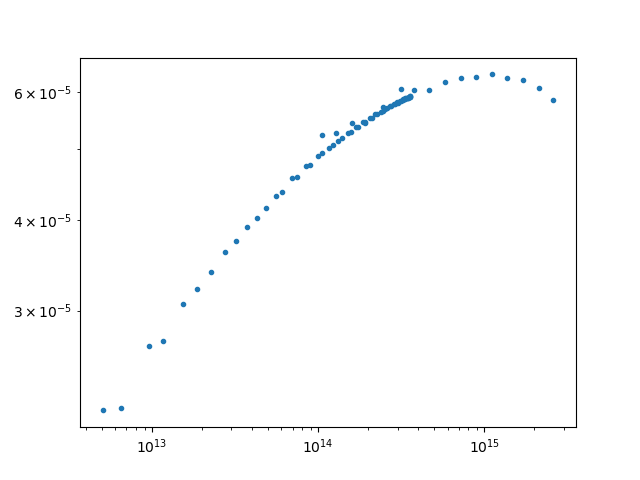

In [33]:
# Plot it to check
fig_check, ax_check  = plt.subplots()
ax_check.plot(LT_dat[:,0], LT_dat[:,1], '.')
#plt.plot(d_3.nxc_from_PL(), d_3.tau_eff(nxc=d_3.nxc_from_PL()))
plt.loglog()
# plt.ylim(-3e-4,6e-3)
plt.show()

In [34]:
# Save the compiled data
fname = '1-863_70C_pc.txt'
np.savetxt(path+fname, LT_dat, header='nxc\ttau', delimiter='\t')

In [ ]:
# # Concatentate the lifetime data into one data structure
# LT_dat = np.column_stack((d_1.nxc_from_PL(), d_1.tau_eff(nxc=d_1.nxc_from_PL())))
# LT_dat.shape
# LT_dat = np.vstack((LT_dat, np.column_stack((d_2.nxc_from_PL(), d_2.tau_eff(nxc=d_2.nxc_from_PL())))))
# LT_dat.shape
# LT_dat = np.vstack((LT_dat, np.column_stack((d_3.nxc_from_PL(), d_3.tau_eff(nxc=d_3.nxc_from_PL())))))
# LT_dat.shape
